In [6]:
import pandas as pd
import numpy as np


In [7]:
df = pd.read_csv('/content/placement.csv')

In [8]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [9]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [11]:
# Steps to be performed for end to end toy project
# (0) Preprocessing + EDA + Feature Selection
# (1) Extract input nad output cols
# (2) Scale the values
# (3) Train test split
# (4) Train the model
# (5) Evaluate the model/model selection
# (6) Deploy the model

In [12]:
df = df.iloc[:,1:]
# The iloc function in pandas is used for integer-based indexing and selection of data from a DataFrame. It allows you to access specific rows and columns of a DataFrame by their integer positions.

# The basic syntax for using iloc is DataFrame.iloc[row_index, column_index], where row_index and column_index specify the integer positions of the rows and columns you want to access.

In [13]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [14]:
import matplotlib.pyplot as plt

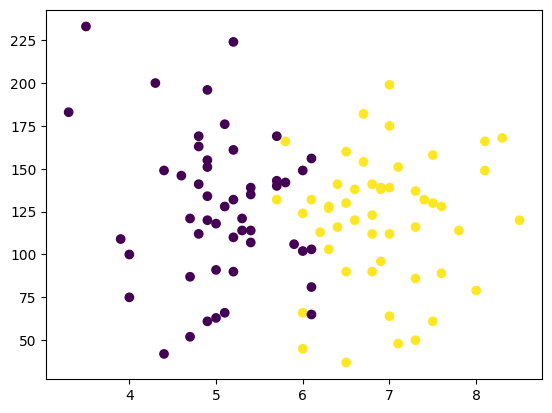

In [15]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'] )

In [16]:
# So now here what we are trying to create is a logistic regression model that classifies the data
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [17]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [18]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

#Train & Test Split

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [20]:
X_train


,cgpa,iq
79,6.5,90.0
35,6.8,90.0
27,6.0,124.0
82,6.5,37.0
29,7.0,112.0
...,...,...
36,5.7,140.0
26,7.0,199.0
54,6.4,141.0
64,7.0,64.0


In [21]:
X_test

,cgpa,iq
56,6.1,65.0
10,6.0,45.0
78,6.1,81.0
30,7.6,128.0
86,5.1,128.0
59,4.8,112.0
67,5.0,118.0
76,4.9,155.0
72,7.3,116.0
44,7.5,61.0


In [22]:
y_train

79    1
35    1
27    1
82    1
29    1
     ..
36    0
26    1
54    1
64    1
96    0
Name: placement, Length: 90, dtype: int64

In [23]:
y_test

56    0
10    1
78    0
30    1
86    0
59    0
67    0
76    0
72    1
44    1
Name: placement, dtype: int64

#Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

In [27]:
X_train

array([[ 0.44834946, -0.91269126],
       [ 0.70980594, -0.91269126],
       [ 0.01258865, -0.05309284],
       [ 0.44834946, -2.25265349],
       [ 0.88411027, -0.35648052],
       [-0.68462865,  0.14916561],
       [ 0.27404513,  0.02275408],
       [ 0.70980594, -0.35648052],
       [ 0.44834946,  0.85707018],
       [ 1.31987108,  0.09860099],
       [-1.12038946, -1.8734189 ],
       [-1.20754162,  0.5031179 ],
       [-0.59747649, -0.30591591],
       [-0.51032433,  0.32614175],
       [-1.0332373 ,  0.37670636],
       [ 1.31987108,  0.80650557],
       [-0.51032433, -0.48289205],
       [ 1.14556675, -1.92398351],
       [ 0.36119729, -0.25535129],
       [ 0.7969581 , -0.76099742],
       [-0.16171568,  1.00876402],
       [ 0.7969581 ,  0.30085945],
       [-0.68462865, -0.91269126],
       [ 2.01708837,  1.05932863],
       [-0.59747649, -0.12893976],
       [ 0.70980594, -0.07837515],
       [-0.51032433,  0.22501253],
       [-1.12038946, -0.98853818],
       [ 1.84278405,

In [28]:
X_test = scaler.transform(X_test)

In [29]:
X_test

array([[ 0.09974081, -1.54474892],
       [ 0.01258865, -2.05039504],
       [ 0.09974081, -1.14023201],
       [ 1.40702324,  0.04803638],
       [-0.77178081,  0.04803638],
       [-1.0332373 , -0.35648052],
       [-0.85893297, -0.20478668],
       [-0.94608514,  0.73065865],
       [ 1.14556675, -0.25535129],
       [ 1.31987108, -1.64587814]])

#Traning the Model

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
clf = LogisticRegression()

In [32]:
clf.fit(X_train,y_train)

LogisticRegression()

#Model Evaluation
Here we simply calculate the accuracy over training data set

In [33]:
y_pred = clf.predict(X_test)

In [34]:
y_test

56    0
10    1
78    0
30    1
86    0
59    0
67    0
76    0
72    1
44    1
Name: placement, dtype: int64

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,y_pred)

0.8

#How to plot decision boundry?

In [37]:
from mlxtend.plotting import plot_decision_regions


In [38]:
!pip install --upgrade matplotlib
!pip install --upgrade mlxtend


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.5 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [39]:
!pip install mlxtend --upgrade --no-deps

In [ ]:
!pip list

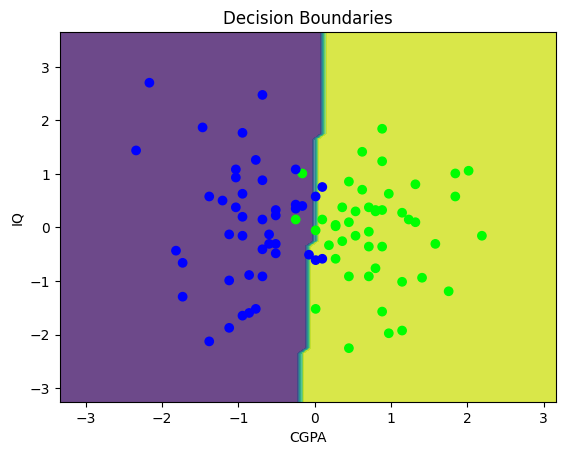

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Fit your classifier on the training data

# Define the meshgrid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Make predictions on the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.brg)
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Decision Boundaries')
plt.show()
